# Jupyter Notebook 2.1: Datenverarbeitung.kNN.ohneTB - Lösung

<hr style="border:1px solid black"> </hr>

Zu Beginn des Notebooks werden die Bilbiotheken eingebunden, welche innerhalb des Notebooks zur Verarbeitung genutzt werden.

In [1]:
import matplotlib.pyplot as plt # Bibliothek für Visualisierungen
import numpy as np # Bibliothek für wissenschaftliche Berechnungen
import pandas as pd # Bibliothek zur Datenanalyse

<hr style="border:1px solid black"> </hr>

### Problemstellung und Datensatz: Klassifikation von Einkaufswagen

Es wird der konstruierte Datensatz aus dem Beispiel zur automatisierten Unterscheidung zwischen
Hamsterkauf und Familieneinkauf betrachtet. 

![Beispiel](Beispiel.png)

In dem Datensatz sind für jeden dokumentierten Einkauf die Anzahl der Packungen Klopapier, die Anzahl der Packungen Nudeln und die Klassifizierung in "Hamsterkauf" und "Familienkauf" angegeben. 

Die Daten werden nun zunächst eingelesen und dann visualisiert.

In [2]:
daten = list([[1,9,0],
    [1,7,0],
    [3,9,0],
    [10,1,0],
    [10,3,0],
    [12,7,0],
    [10,9,0],
    [1,4,1],
    [2,5,1],
    [3,3,1],
    [5,1,1],
    [5,5,1],
    [7,1,1],
    [8,2,1],
    [8,4,1]])
daten = pd.DataFrame(daten, columns = ['Nudeln','Klopapier','Klasse'])
daten

,Nudeln,Klopapier,Klasse
0,1,9,0
1,1,7,0
2,3,9,0
3,10,1,0
4,10,3,0
5,12,7,0
6,10,9,0
7,1,4,1
8,2,5,1
9,3,3,1


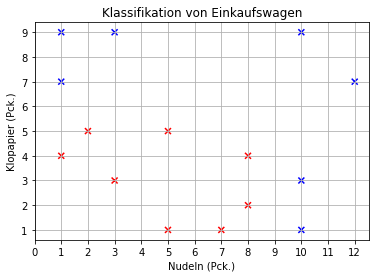

In [3]:
plt.scatter(daten['Nudeln'],daten['Klopapier'],c=daten['Klasse'].values,marker='x',cmap="bwr")
plt.xticks(np.arange(13))
plt.grid()
plt.title('Klassifikation von Einkaufswagen') 
plt.xlabel('Nudeln (Pck.)') 
plt.ylabel('Klopapier (Pck.)') 
plt.show;

Es wird nun ein neues Beispiel mit den Featureausprägungen [8, 7] betrachtet. In der folgenden Zelle wird das neue Beispiel zunächst in der bekannten Grafik visualisiert.

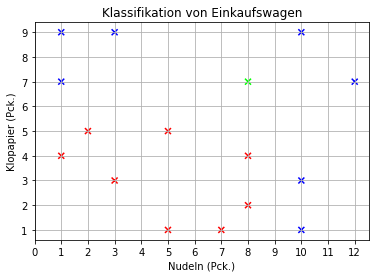

In [4]:
daten_plot = pd.concat([daten, pd.Series({'Nudeln': 8, 'Klopapier': 7, 'Klasse': 2}).to_frame().T])
plt.scatter(daten_plot['Nudeln'],daten_plot['Klopapier'],c=daten_plot['Klasse'].values,marker='x',cmap="brg")
plt.xticks(np.arange(13))
plt.grid()
plt.title('Klassifikation von Einkaufswagen') 
plt.xlabel('Nudeln (Pck.)') 
plt.ylabel('Klopapier (Pck.)') 
plt.show; 

<hr style="border:1px solid black"> </hr>

### Programmierung des kNN

In den folgenden drei Zellen werden drei Funktionen angelegt, um den Pseudocode des kNN Algorithmus umzusetzen.

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> In den folgenden Zellen werden die Funktionen <tt>abstand_euklidisch</tt>, <tt>kNN_suche</tt> und <tt>kNN_vorhersage</tt> definiert und im Anschluss die Funktion <tt>kNN_vorhersage</tt> auf das neue Beispiel von oben angewendet. Führen Sie die Zellen aus und erklären Sie unter Zuhilfenahme der Funktionsdefinitionen, was der zugehörige Output bedeutet. <b>Kommentieren Sie den Code aus den Funktionsdefinitionen und markieren Sie die Stellen, die Ihnen nicht klar geworden sind.</b> </div>

In [5]:
# Anlegen der Funktionen "abstand_euklidisch" und "abstand_betrag"
# Eingabeparameter : a,b - n dimensionale Vektoren
# Berechnet den euklidischen Abstand zwischen den Eingabeparametern x und y
def abstand_euklidisch(a, b):
    abstand = 0.0
    for i in range(len(a)): # Da hier bezüglich "len(x)" gerechnet wird, erhalten wir unten keine Probleme wenn zweidimensional (neu) mit dreidimensional (zeile) verrechnet wird
        abstand += (a[i] - b[i])**2 
    return np.sqrt(abstand)
# Berechnet den betragsmäßigen Abstand zwischen den Eingabeparametern x und y
def abstand_betrag(a, b):
    abstand = 0.0
    for i in range(len(a)): # s.o.
        abstand += np.absolute(a[i] - b[i]) 
    return abstand

In [6]:
# Anlegen der Funktion kNN_suche
# Eingabeparameter : X - Datenmenge mit Features/Label, neu - neu zu klassifizierendes Beispiel, k - Anzahl Nachbarn
# Gibt eine Liste mit den k entscheidenden Nachbar bestimmt nach kleinstem euklidischem Abstand aus
def kNN_suche(X, neu, k):
    abstaende = list() # Vordeklaration einer leeren Liste
    for zeile in X: # Geht nacheinander alle Beispiele durch
        abstand = abstand_euklidisch(neu,zeile) # Bestimmt den eukl.Abstand jedes Beispiels im Datensatz zum neuen Beispiel
        abstaende.append((zeile, abstand)) # Erweitert die Liste um das Beispiel und den zugehörigen eukl.Abstand 
    abstaende.sort(key=lambda tup: tup[1]) # Die Liste wird sortiert nach tup[1] ("zweites" Tupel), also dem eukl.Abstand 
    print("Variable abstaende:")
    print(abstaende) # Die sortierte Liste wird ausgegeben
    nachbarn = list() # Vordeklaration einer leeren Liste
    for i in range(k): # Geht von 1 bis Anzahl der Nachbarn
        nachbarn.append(abstaende[i][0]) # Erweitert die Liste um das erste Tupel der sortierten abstaende Liste (zeile)
    print("Variable nachbarn:")
    print(nachbarn) # Liste mit den k entscheidenden Nachbarn wird ausgegeben
    return nachbarn # Liste mit den k entscheidenden Nachbarn wird zurückgegeben

In [7]:
# Anlegen der Funktion kNN_vorhersage
# Eingabeparameter : X - Datenmenge mit Features/Label, neu - neu zu klassifizierendes Beispiel, k - Anzahl Nachbarn
# Gibt unter Zuhilfenahme der obigen Funktion die Klasse des neuen Beispiels zurück
def kNN_vorhersage(X, neu, k):
    nachbarn = kNN_suche(X, neu, k) # Ruft mit Hilfe der obigen Funktion Liste mit den k entscheidenden Nachbarn auf
    output = [row[-1] for row in nachbarn] # Legt Liste an, die nur die Klasse der Liste Nachbarn enthält
    vorhersage = max(set(output), key=output.count) # Bestimmt das Maximum der Einträge von Output (höchster Klasserwert)
    return vorhersage # Gibt die Klasse zurück

In [8]:
# Anwenden der Funktionen
beispiel = np.array([8, 7])
kNN_vorhersage(daten.values, beispiel, 1)

Variable abstaende:
[(array([10,  9,  0], dtype=int64), 2.8284271247461903), (array([8, 4, 1], dtype=int64), 3.0), (array([5, 5, 1], dtype=int64), 3.605551275463989), (array([12,  7,  0], dtype=int64), 4.0), (array([10,  3,  0], dtype=int64), 4.47213595499958), (array([8, 2, 1], dtype=int64), 5.0), (array([3, 9, 0], dtype=int64), 5.385164807134504), (array([7, 1, 1], dtype=int64), 6.082762530298219), (array([10,  1,  0], dtype=int64), 6.324555320336759), (array([2, 5, 1], dtype=int64), 6.324555320336759), (array([3, 3, 1], dtype=int64), 6.4031242374328485), (array([5, 1, 1], dtype=int64), 6.708203932499369), (array([1, 7, 0], dtype=int64), 7.0), (array([1, 9, 0], dtype=int64), 7.280109889280518), (array([1, 4, 1], dtype=int64), 7.615773105863909)]
Variable nachbarn:
[array([10,  9,  0], dtype=int64)]


0

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> Ergänzen Sie den Code in der nachfolgenden Zelle so, dass das neue Beispiel nun bezüglich drei Nachbarn klassifiziert wird. Ändert sich das Label des neues Beispiels durch diese Veränderung? </div>    

In [9]:
# Platz für Arbeitsauftrag
kNN_vorhersage(daten.values, beispiel, 3)

Variable abstaende:
[(array([10,  9,  0], dtype=int64), 2.8284271247461903), (array([8, 4, 1], dtype=int64), 3.0), (array([5, 5, 1], dtype=int64), 3.605551275463989), (array([12,  7,  0], dtype=int64), 4.0), (array([10,  3,  0], dtype=int64), 4.47213595499958), (array([8, 2, 1], dtype=int64), 5.0), (array([3, 9, 0], dtype=int64), 5.385164807134504), (array([7, 1, 1], dtype=int64), 6.082762530298219), (array([10,  1,  0], dtype=int64), 6.324555320336759), (array([2, 5, 1], dtype=int64), 6.324555320336759), (array([3, 3, 1], dtype=int64), 6.4031242374328485), (array([5, 1, 1], dtype=int64), 6.708203932499369), (array([1, 7, 0], dtype=int64), 7.0), (array([1, 9, 0], dtype=int64), 7.280109889280518), (array([1, 4, 1], dtype=int64), 7.615773105863909)]
Variable nachbarn:
[array([10,  9,  0], dtype=int64), array([8, 4, 1], dtype=int64), array([5, 5, 1], dtype=int64)]


1

<div class="alert alert-block alert-success">
<b>Arbeitsauftrag:</b> Füllen Sie mittels "copy+paste" die nachfolgenden Zellen mit einer erneuten Definition der Funktion <tt>kNN_suche</tt>. Achten Sie darauf, ob der Code innerhalb der Funktionen noch auf die neue Metrik angepasst werden muss. </div>    

In [10]:
# Anlegen der Funktion kNN_suche
# Eingabeparameter : X - Datenmenge mit Features/Label, neu - neu zu klassifizierendes Beispiel, k - Anzahl Nachbarn
# Gibt eine Liste mit den k entscheidenden Nachbar bestimmt nach kleinstem euklidischem Abstand aus
def kNN_suche(X, neu, k):
    abstaende = list() # Vordeklaration einer leeren Liste
    for zeile in X: # Geht nacheinander alle Beispiele durch
        abstand = abstand_betrag(neu,zeile) # Bestimmt den eukl.Abstand jedes Beispiels im Datensatz zum neuen Beispiel
        abstaende.append((zeile, abstand)) # Erweitert die Liste um das Beispiel und den zugehörigen eukl.Abstand 
    abstaende.sort(key=lambda tup: tup[1]) # Die Liste wird sortiert nach tup[1] ("zweites" Tupel), also dem eukl.Abstand 
    print("Variable abstaende:")
    print(abstaende) # Die sortierte Liste wird ausgegeben
    nachbarn = list() # Vordeklaration einer leeren Liste
    for i in range(k): # Geht von 1 bis Anzahl der Nachbarn
        nachbarn.append(abstaende[i][0]) # Erweitert die Liste um das erste Tupel der sortierten abstaende Liste (zeile)
    print("Variable nachbarn:")
    print(nachbarn) # Liste mit den k entscheidenden Nachbarn wird ausgegeben
    return nachbarn # Liste mit den k entscheidenden Nachbarn wird zurückgegeben

In den nachfolgenden beiden Zellen wird das neue Beispiel nun erneut bezüglich einem und drei Nachbarn klassifiziert. 

In [11]:
kNN_vorhersage(daten.values, beispiel, 1)

Variable abstaende:
[(array([8, 4, 1], dtype=int64), 3.0), (array([12,  7,  0], dtype=int64), 4.0), (array([10,  9,  0], dtype=int64), 4.0), (array([5, 5, 1], dtype=int64), 5.0), (array([8, 2, 1], dtype=int64), 5.0), (array([10,  3,  0], dtype=int64), 6.0), (array([1, 7, 0], dtype=int64), 7.0), (array([3, 9, 0], dtype=int64), 7.0), (array([7, 1, 1], dtype=int64), 7.0), (array([10,  1,  0], dtype=int64), 8.0), (array([2, 5, 1], dtype=int64), 8.0), (array([1, 9, 0], dtype=int64), 9.0), (array([3, 3, 1], dtype=int64), 9.0), (array([5, 1, 1], dtype=int64), 9.0), (array([1, 4, 1], dtype=int64), 10.0)]
Variable nachbarn:
[array([8, 4, 1], dtype=int64)]


1

In [12]:
kNN_vorhersage(daten.values, beispiel, 3)

Variable abstaende:
[(array([8, 4, 1], dtype=int64), 3.0), (array([12,  7,  0], dtype=int64), 4.0), (array([10,  9,  0], dtype=int64), 4.0), (array([5, 5, 1], dtype=int64), 5.0), (array([8, 2, 1], dtype=int64), 5.0), (array([10,  3,  0], dtype=int64), 6.0), (array([1, 7, 0], dtype=int64), 7.0), (array([3, 9, 0], dtype=int64), 7.0), (array([7, 1, 1], dtype=int64), 7.0), (array([10,  1,  0], dtype=int64), 8.0), (array([2, 5, 1], dtype=int64), 8.0), (array([1, 9, 0], dtype=int64), 9.0), (array([3, 3, 1], dtype=int64), 9.0), (array([5, 1, 1], dtype=int64), 9.0), (array([1, 4, 1], dtype=int64), 10.0)]
Variable nachbarn:
[array([8, 4, 1], dtype=int64), array([12,  7,  0], dtype=int64), array([10,  9,  0], dtype=int64)]


0

<div class="alert alert-block alert-success">
<b>Frage:</b> Betrachten Sie das Ergebnis im Vergleich zu der oben durchgeführten Klassifikation: Warum ändert sich das vorhergesagte Label? Erläutern Sie unter Zuhilfenahme des Streudiagramms. </div> 

**Antwort:** Die Ausgabe, also Klassifikation, dreht sich im Vergleich zu vorher um. Betrachtung des Streudiagramms zeigt, dass bei unterschiedlichen Metriken unterschiedliche nächste Nachbarn für den "dritten Nachbarn" ermittelt werden. 